# Importing Libraries

In [1]:
import numpy as np # Version '1.26.4'
import pandas as pd # Version '2.2.2'
import matplotlib # Version '3.9.0'
from matplotlib import pyplot as plt 
import seaborn as sns # Version '0.13.2'

print('Numpy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', matplotlib.__version__)
print('Seaborn', sns.__version__)

Numpy 1.26.4
Pandas 2.2.2
Matplotlib 3.9.0
Seaborn 0.13.2


# Loading Dataset

In [2]:
df = pd.read_csv('../datasets/data.csv')

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lng            7421 non-null   float64
 1   lat            7421 non-null   float64
 2   maydoni        7421 non-null   float64
 3   xonalar_soni   7421 non-null   int64  
 4   kv_qavat       7421 non-null   int64  
 5   qavatlar_soni  7421 non-null   int64  
 6   tuman          7421 non-null   object 
 7   manzil         7421 non-null   object 
 8   narxi          7421 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 521.9+ KB


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.iloc[:, 2:].describe()

,maydoni,xonalar_soni,kv_qavat,qavatlar_soni,narxi
count,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000
mean,73.274057,2.620520,3.712119,6.049368,59251.022602
std,36.694488,1.068001,2.258129,2.620323,45612.710073
min,14.000000,1.000000,1.000000,1.000000,10500.000000
25%,50.000000,2.000000,2.000000,4.000000,35000.000000
50%,66.000000,3.000000,3.000000,5.000000,46500.000000
75%,85.000000,3.000000,5.000000,9.000000,67000.000000
max,456.000000,10.000000,19.000000,25.000000,800000.000000


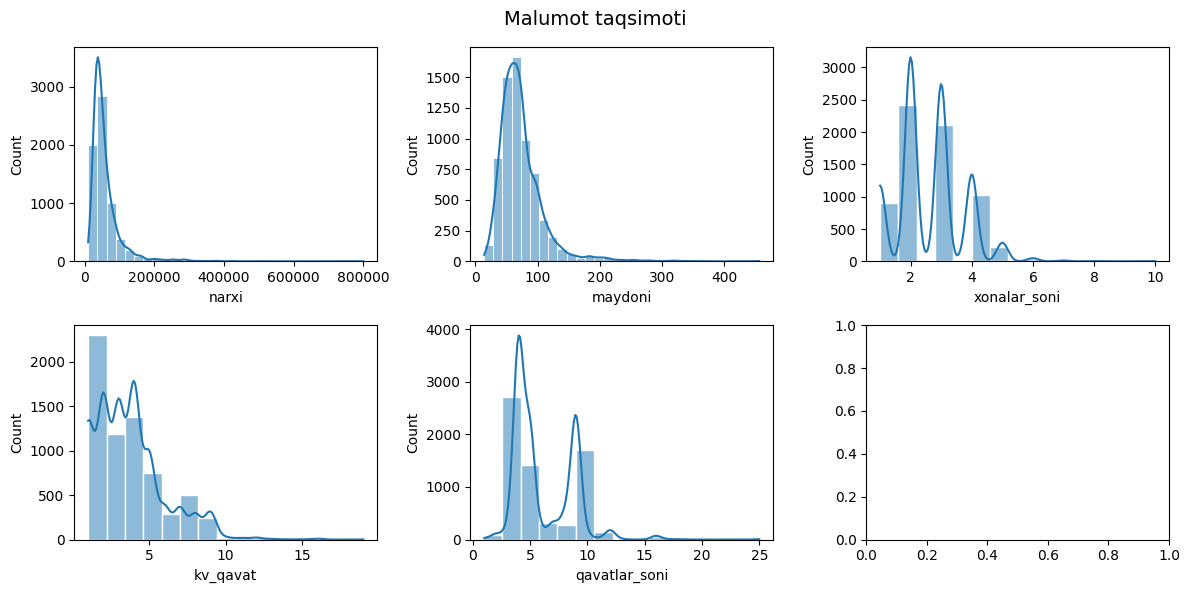

In [6]:
fig, ax = plt.subplots(2,3, figsize=(12,6), dpi=100)
sns.histplot(df['narxi'], ax=ax[0, 0], edgecolor='w', bins=30, kde=True)
sns.histplot(df['maydoni'], ax=ax[0, 1], edgecolor='w', bins=30, kde=True)
sns.histplot(df['xonalar_soni'], ax=ax[0, 2], edgecolor='w', bins=15, kde=True)
sns.histplot(df['kv_qavat'], ax=ax[1, 0], edgecolor='w', bins=15, kde=True)
sns.histplot(df['qavatlar_soni'], ax=ax[1, 1], edgecolor='w', bins=15, kde=True)
plt.suptitle('Malumot taqsimoti', fontsize=14)
plt.tight_layout()
plt.show()

In [7]:
tuman_narxlar = df.groupby('tuman')['narxi'].mean().sort_values(ascending=False)
tuman_narxlar

tuman
Mirobod          96458.587644
Yakkasaroy       73642.778584
Shayhontohur     69448.941176
Yunusobod        62326.037037
Mirzo Ulugbek    58224.629475
Olmzor           51869.048387
Yashnobod        51014.267574
Chilonzor        46444.391599
Uchtepa          44844.382093
Sergeli          44140.108108
Yangihayot       37192.307692
Bektemir         29462.500000
Name: narxi, dtype: float64

In [8]:
tumanlar = df['tuman'].value_counts(normalize=True).sort_values(ascending=False)
tumanlar

tuman
Chilonzor        0.219480
Mirzo Ulugbek    0.178587
Yunusobod        0.120446
Uchtepa          0.117918
Mirobod          0.103494
Yakkasaroy       0.081933
Yashnobod        0.065576
Shayhontohur     0.050558
Olmzor           0.036877
Sergeli          0.022007
Yangihayot       0.001933
Bektemir         0.001190
Name: proportion, dtype: float64

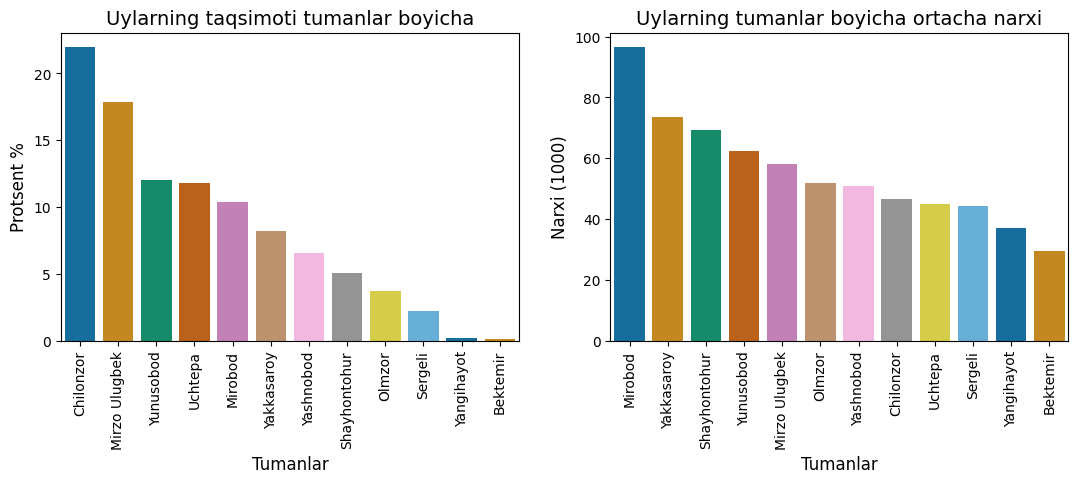

In [9]:
plt.figure(figsize=(13,4), dpi=100)

plt.subplot(1,2,1)
sns.barplot(x=tumanlar.index, y=tumanlar.values * 100, palette='colorblind', hue=tumanlar.index, legend=False)
plt.title('Uylarning taqsimoti tumanlar boyicha', fontsize=14)
plt.xlabel('Tumanlar', fontsize=12)
plt.ylabel('Protsent %', fontsize=12)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x=tuman_narxlar.index, y=tuman_narxlar.values / 1000, palette='colorblind', hue=tumanlar.index, legend=False)
plt.title('Uylarning tumanlar boyicha ortacha narxi', fontsize=14)
plt.xlabel('Tumanlar', fontsize=12)
plt.ylabel('Narxi (1000)', fontsize=12)
plt.xticks(rotation=90)

plt.show()

In [10]:
df.corrwith(df['narxi'], numeric_only=True).sort_values(ascending=False)

narxi            1.000000
maydoni          0.785239
xonalar_soni     0.550749
qavatlar_soni    0.226902
lng              0.080661
kv_qavat         0.065588
lat              0.016142
dtype: float64

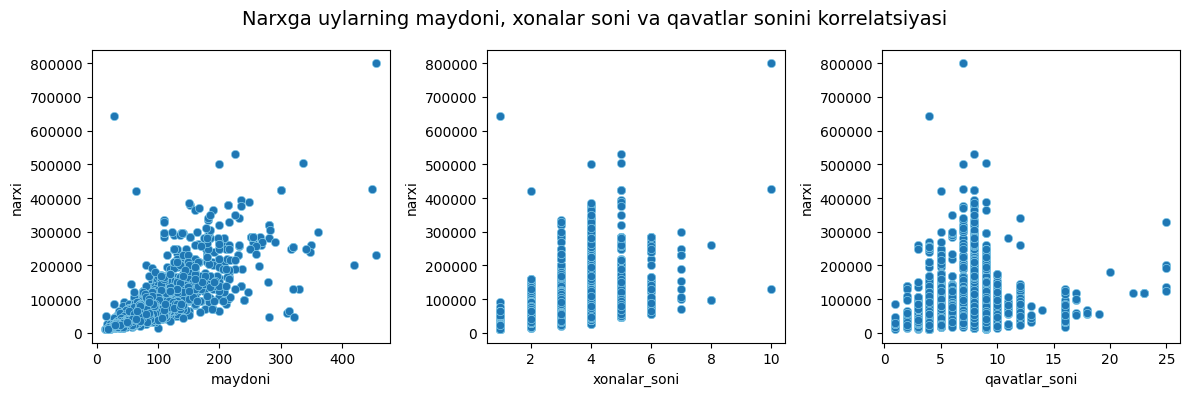

In [11]:
fig, ax = plt.subplots(1,3, figsize=(12,4), dpi=100)
sns.scatterplot(x=df['maydoni'], y=df['narxi'], ax=ax[0], edgecolor='skyblue')
sns.scatterplot(x=df['xonalar_soni'], y=df['narxi'], ax=ax[1], edgecolor='skyblue')
sns.scatterplot(x=df['qavatlar_soni'], y=df['narxi'], ax=ax[2], edgecolor='skyblue')
plt.suptitle('Narxga uylarning maydoni, xonalar soni va qavatlar sonini korrelatsiyasi', fontsize=14)
plt.tight_layout()
plt.show()

In [12]:
# Maydoni buyicha
df[(df['maydoni'] < 100)&(df['narxi'] > 400000)]

,lng,lat,maydoni,xonalar_soni,kv_qavat,qavatlar_soni,tuman,manzil,narxi
4832,69.241563,41.267308,64.0,2,1,5,Yakkasaroy,"город Ташкент, Yakkasaroy район, Кушбеги",420000
4841,69.215208,41.277310,28.0,1,3,4,Chilonzor,"город Ташкент, Chilonzor район, Катта козиробод",644000


In [13]:
# Maydoni buyicha
df[(df['maydoni'] >= 200)&(df['narxi'] > 400000)]

,lng,lat,maydoni,xonalar_soni,kv_qavat,qavatlar_soni,tuman,manzil,narxi
729,69.273072,41.298383,300.0,5,3,8,Mirobod,"город Ташкент, Mirobod район, Айбека (пр-т Кос...",425000
1532,69.280304,41.329887,448.0,10,7,7,Yunusobod,"город Ташкент, Yunusobod район, Минор",425600
1668,69.275878,41.296644,456.0,10,3,7,Mirobod,"город Ташкент, Mirobod район, Фидокор (Чехова)",800000
1968,69.278509,41.299156,300.0,5,3,8,Mirobod,"город Ташкент, Mirobod район, Тараса Шевченко",425000
3115,69.298766,41.322303,200.0,4,2,7,Mirzo Ulugbek,"город Ташкент, Mirzo Ulugbek район, Кори Ниёзий",500000
3562,69.278509,41.299156,225.0,5,5,8,Mirobod,"город Ташкент, Mirobod район, Тараса Шевченко",530000
3591,69.301397,41.320087,336.0,5,8,9,Mirzo Ulugbek,"город Ташкент, Mirzo Ulugbek район, Дархан",504000


In [14]:
# Maydoni buyicha
df[(df['maydoni'] > 400)&(df['narxi'] > 700000)]

,lng,lat,maydoni,xonalar_soni,kv_qavat,qavatlar_soni,tuman,manzil,narxi
1668,69.275878,41.296644,456.0,10,3,7,Mirobod,"город Ташкент, Mirobod район, Фидокор (Чехова)",800000


In [15]:
# Maydoni buyicha
df[(df['maydoni'] > 250)&(df['narxi'] <= 100000)]

,lng,lat,maydoni,xonalar_soni,kv_qavat,qavatlar_soni,tuman,manzil,narxi
1800,69.228898,41.204151,310.0,5,9,9,Sergeli,"город Ташкент, Sergeli район, 7",57500
3905,69.300233,41.285135,313.0,3,5,5,Mirobod,"город Ташкент, Mirobod район, Сайхун",65000
4329,69.316081,41.296058,321.0,5,1,1,Yashnobod,"город Ташкент, Yashnobod район, Эльбека",48000
6579,69.293713,41.275891,280.0,2,9,9,Mirobod,"город Ташкент, Mirobod район, Мингурик",48000


In [16]:
# Maydoni buyicha
df[(df['maydoni'] > 400)&(df['narxi'] <= 300000)]

,lng,lat,maydoni,xonalar_soni,kv_qavat,qavatlar_soni,tuman,manzil,narxi
1666,69.289813,41.305222,456.0,4,8,8,Yashnobod,"город Ташкент, Yashnobod район, Садыка Азимова...",230000
5098,69.250504,41.324292,420.0,6,7,7,Shayhontohur,"город Ташкент, Shayhontohur район, Хадра",200000


In [17]:
# Xonalar buyicha
df[(df['xonalar_soni'] >= 8)&(df['narxi'] <= 200000)]

,lng,lat,maydoni,xonalar_soni,kv_qavat,qavatlar_soni,tuman,manzil,narxi
1669,69.368351,41.325487,330.0,10,1,4,Mirzo Ulugbek,"город Ташкент, Mirzo Ulugbek район, Тимура Малика",130000
6491,69.184941,41.271084,240.0,8,8,9,Chilonzor,"город Ташкент, Chilonzor район, Чиланзар 19-й ...",96000
6492,69.262953,41.282805,240.0,8,9,10,Chilonzor,"город Ташкент, Chilonzor район, Нукус",96000


In [18]:
# Xonalar buyicha
df[(df['xonalar_soni'] <= 2)&(df['narxi'] >= 400000)]

,lng,lat,maydoni,xonalar_soni,kv_qavat,qavatlar_soni,tuman,manzil,narxi
4832,69.241563,41.267308,64.0,2,1,5,Yakkasaroy,"город Ташкент, Yakkasaroy район, Кушбеги",420000
4841,69.215208,41.277310,28.0,1,3,4,Chilonzor,"город Ташкент, Chilonzor район, Катта козиробод",644000


In [19]:
df = df.drop([4832, 4841, 1669, 6491, 6492, 1800, 3905, 4329, 6579, 1666, 1668, 729, 1532, 1968, 3115, 3562, 3591])

# ReEDA

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6708 entries, 0 to 7420
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lng            6708 non-null   float64
 1   lat            6708 non-null   float64
 2   maydoni        6708 non-null   float64
 3   xonalar_soni   6708 non-null   int64  
 4   kv_qavat       6708 non-null   int64  
 5   qavatlar_soni  6708 non-null   int64  
 6   tuman          6708 non-null   object 
 7   manzil         6708 non-null   object 
 8   narxi          6708 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 524.1+ KB


In [21]:
df.iloc[:, 2:].describe()

,maydoni,xonalar_soni,kv_qavat,qavatlar_soni,narxi
count,6708.000000,6708.000000,6708.000000,6708.000000,6708.000000
mean,72.737184,2.613447,3.708855,6.047108,58589.598539
std,34.679499,1.050866,2.255037,2.620671,42145.254288
min,14.000000,1.000000,1.000000,1.000000,10500.000000
25%,50.000000,2.000000,2.000000,4.000000,35000.000000
50%,66.000000,3.000000,3.000000,5.000000,46500.000000
75%,85.000000,3.000000,5.000000,9.000000,67000.000000
max,420.000000,8.000000,19.000000,25.000000,395000.000000


In [22]:
tumanlar = df['tuman'].value_counts(normalize=True).sort_values(ascending=False)
tumanlar

tuman
Chilonzor        0.219589
Mirzo Ulugbek    0.178593
Yunusobod        0.120602
Uchtepa          0.118217
Mirobod          0.102862
Yakkasaroy       0.081992
Yashnobod        0.065444
Shayhontohur     0.050686
Olmzor           0.036971
Sergeli          0.021914
Yangihayot       0.001938
Bektemir         0.001193
Name: proportion, dtype: float64

In [23]:
tuman_narxlar = df.groupby('tuman')['narxi'].mean().sort_values(ascending=False)
tuman_narxlar

tuman
Mirobod          93974.169565
Yakkasaroy       73013.038182
Shayhontohur     69448.941176
Yunusobod        61876.996292
Mirzo Ulugbek    57423.856427
Olmzor           51869.048387
Yashnobod        50613.421412
Chilonzor        45971.433809
Uchtepa          44844.382093
Sergeli          44049.224490
Yangihayot       37192.307692
Bektemir         29462.500000
Name: narxi, dtype: float64

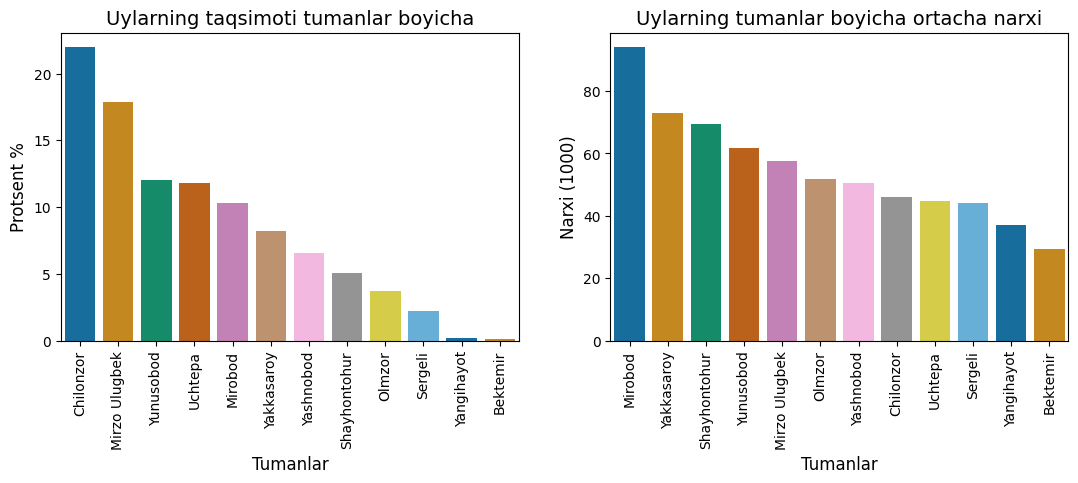

In [24]:
plt.figure(figsize=(13,4), dpi=100)

plt.subplot(1,2,1)
sns.barplot(x=tumanlar.index, y=tumanlar.values * 100, palette='colorblind', hue=tumanlar.index, legend=False)
plt.title('Uylarning taqsimoti tumanlar boyicha', fontsize=14)
plt.xlabel('Tumanlar', fontsize=12)
plt.ylabel('Protsent %', fontsize=12)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x=tuman_narxlar.index, y=tuman_narxlar.values / 1000, palette='colorblind', hue=tumanlar.index, legend=False)
plt.title('Uylarning tumanlar boyicha ortacha narxi', fontsize=14)
plt.xlabel('Tumanlar', fontsize=12)
plt.ylabel('Narxi (1000)', fontsize=12)
plt.xticks(rotation=90)

plt.savefig('../figures/Uylarning tumanlar boyicha taqsimoti va ortacha narxi.png')
plt.show()

In [25]:
df_map = df.groupby(['lng', 'lat'])[['maydoni', 'narxi']].mean()
df_map.reset_index(inplace=True)

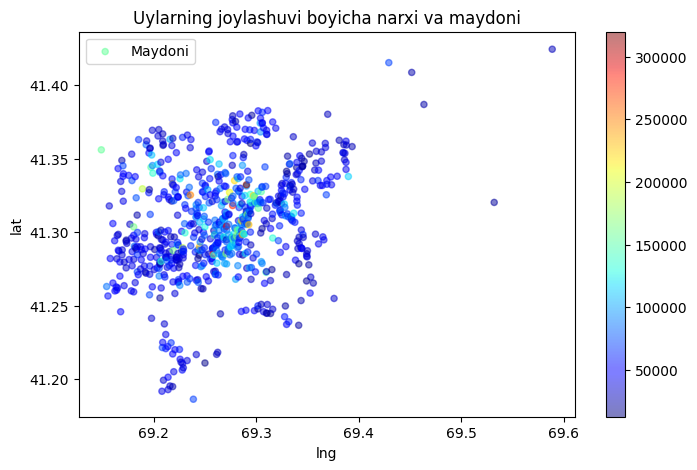

In [26]:
df_map.plot(
    kind='scatter',
    x='lng',
    y='lat',
    c=df_map['narxi'],
    colormap='jet',
    colorbar=True,
    alpha=.5,
    label='Maydoni',
    figsize=(8,5)
)
plt.title('Uylarning joylashuvi boyicha narxi va maydoni')
plt.savefig('../figures/Uylarning joylashuvi boyicha narxi va maydoni.png')
plt.show()

In [27]:
df.corrwith(df['narxi'], numeric_only=True).sort_values(ascending=False)

narxi            1.000000
maydoni          0.810207
xonalar_soni     0.564602
qavatlar_soni    0.240738
lng              0.083420
kv_qavat         0.069072
lat              0.019077
dtype: float64

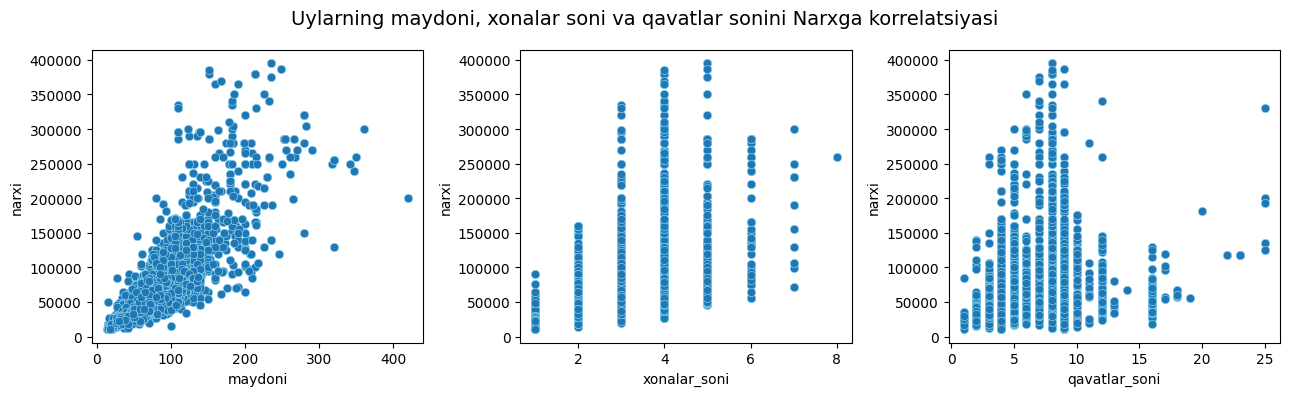

In [28]:
fig, ax = plt.subplots(1,3, figsize=(13,4), dpi=100)
sns.scatterplot(x=df['maydoni'], y=df['narxi'], ax=ax[0], edgecolor='skyblue')
sns.scatterplot(x=df['xonalar_soni'], y=df['narxi'], ax=ax[1], edgecolor='skyblue')
sns.scatterplot(x=df['qavatlar_soni'], y=df['narxi'], ax=ax[2], edgecolor='skyblue')
plt.suptitle('Uylarning maydoni, xonalar soni va qavatlar sonini Narxga korrelatsiyasi', fontsize=14)

plt.savefig('../figures/Uylarning maydoni, xonalar soni va qavatlar sonini Narxga korrelatsiyasi.png')
plt.tight_layout()
plt.show()

# Data Export

In [29]:
df.to_csv('../datasets/data_clean.csv', index=False)
df_map.to_csv('../datasets/data_map.csv', index=False)